In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df= pd.read_excel("iris_python.xlsx")

In [3]:
df.head(10)

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [4]:
df.shape

(150, 5)

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   SL              150 non-null    float64
 1   SW              150 non-null    float64
 2   PL              150 non-null    float64
 3   PW              150 non-null    float64
 4   Classification  150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [6]:
df.columns

Index(['SL', 'SW', 'PL', 'PW', 'Classification'], dtype='object')

In [7]:
df.describe()

,SL,SW,PL,PW
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


In [8]:
classifications = df["Classification"].value_counts()

In [9]:
classifications

Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: Classification, dtype: int64

In [10]:
df.isnull().sum()

SL                0
SW                0
PL                0
PW                0
Classification    0
dtype: int64

<Axes: title={'center': 'CLASSIFICATION'}>

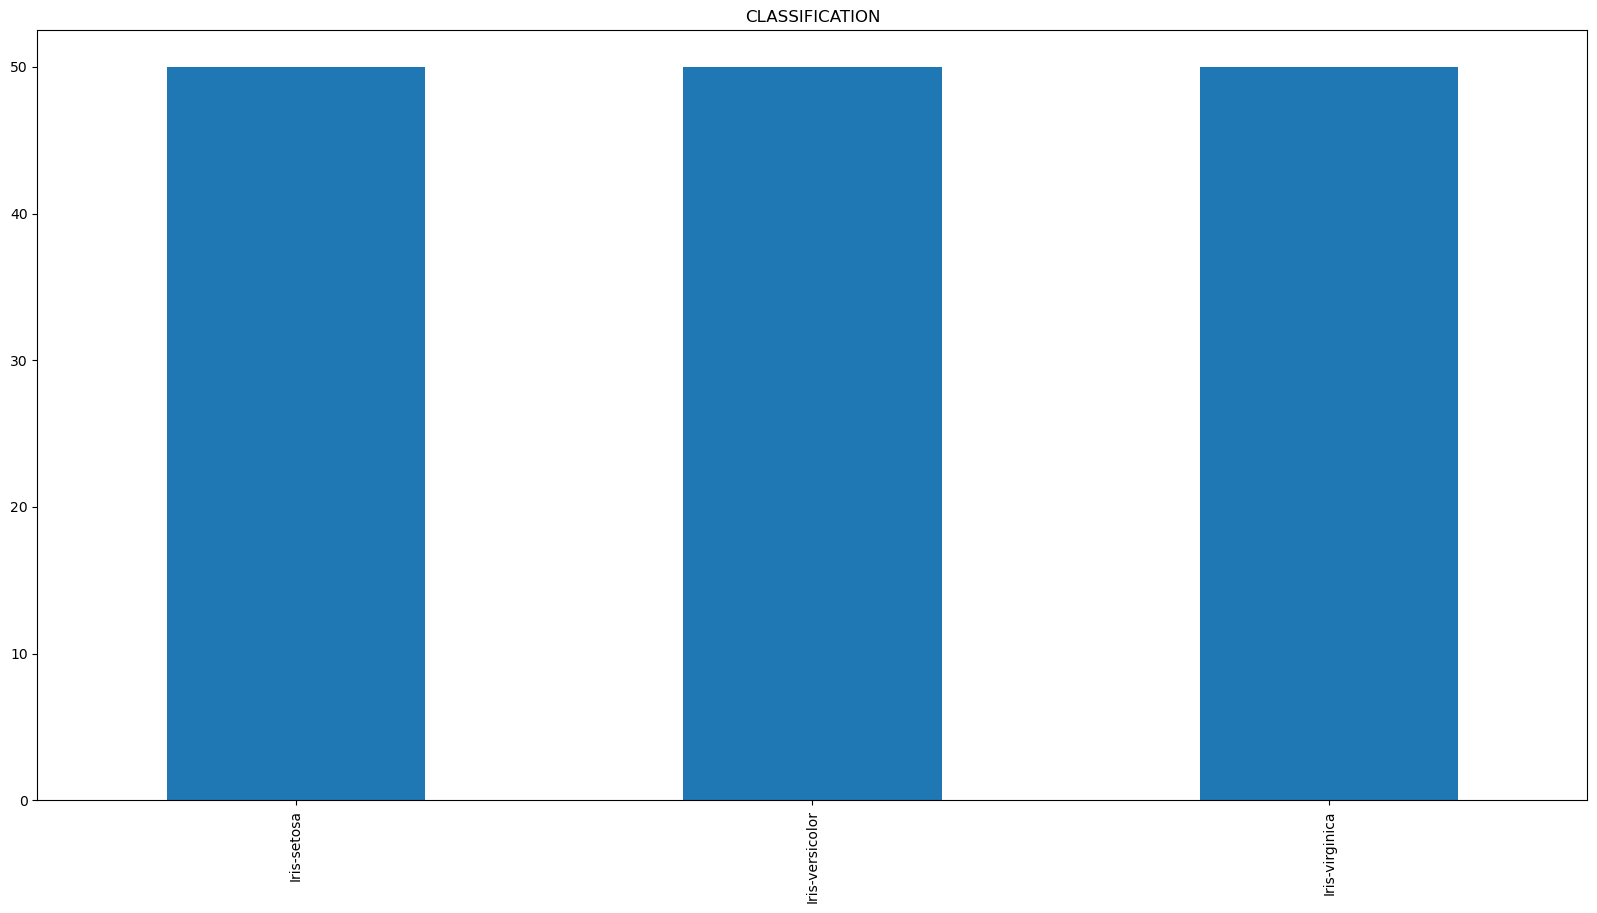

In [11]:
df["Classification"].value_counts().plot.bar(figsize=(20,10), title= 'CLASSIFICATION') 

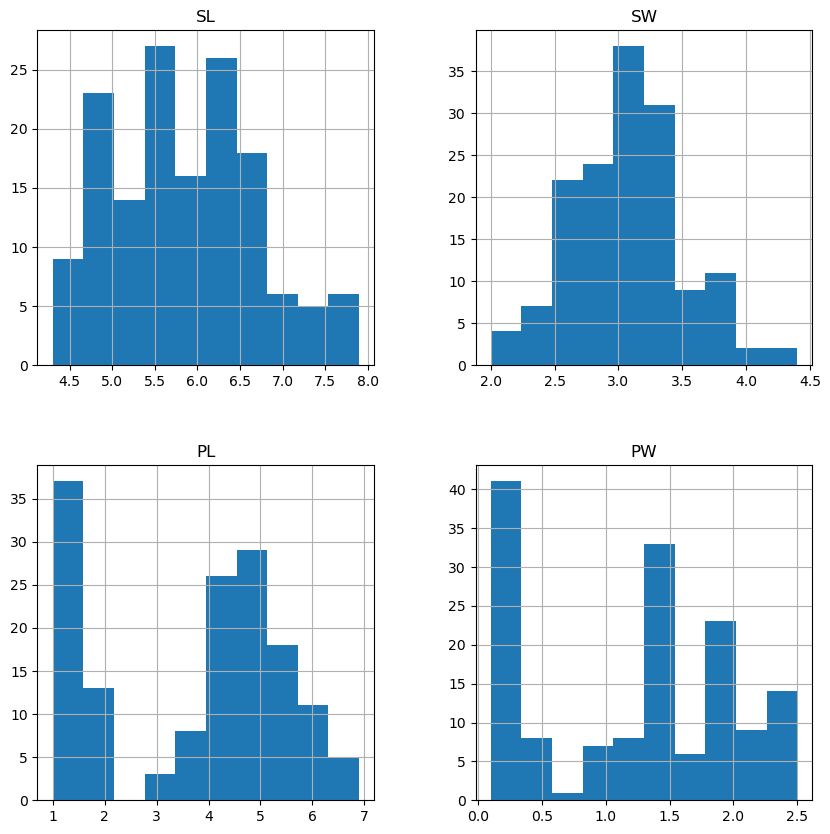

In [12]:
freqdata = df.select_dtypes(include="float64")
freqdata.hist(figsize =(10,10))
plt.show()

<Axes: xlabel='SL'>

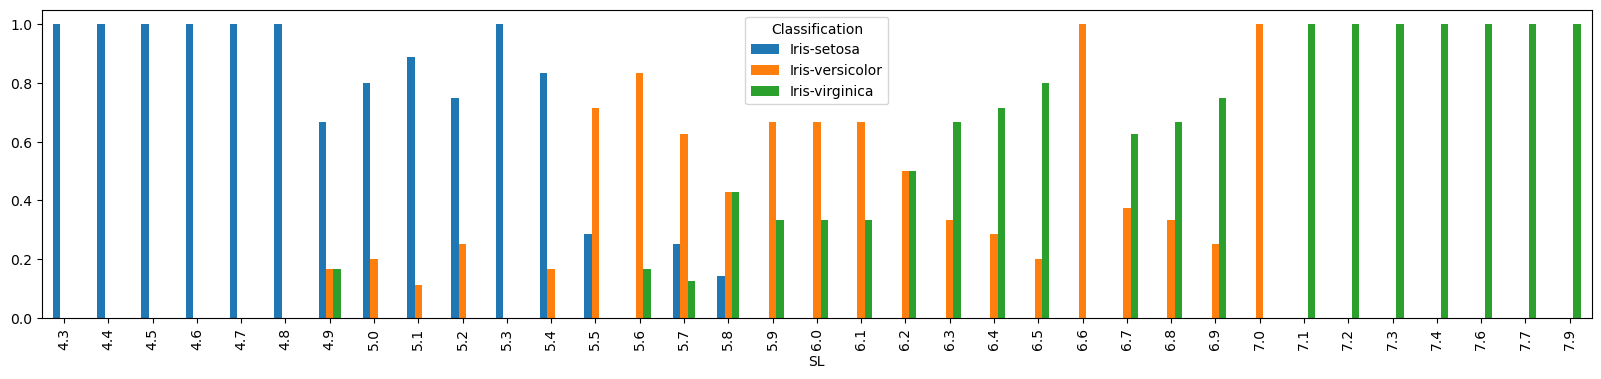

In [13]:
sepal_length=pd.crosstab(df['SL'],df['Classification']) 
sepal_length.div(sepal_length.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(20,4))

<Axes: xlabel='SW'>

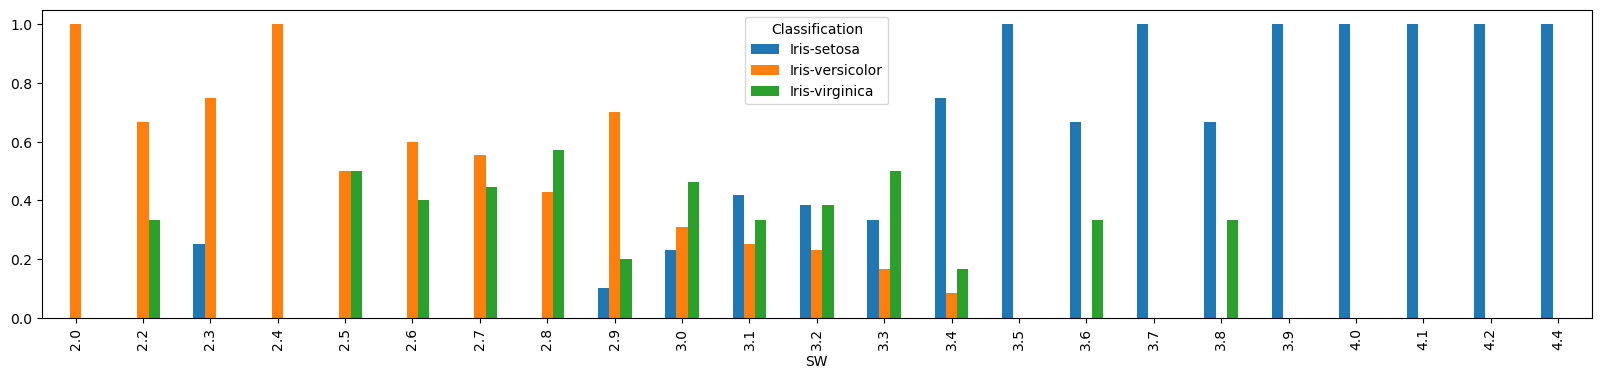

In [14]:
sepal_width=pd.crosstab(df['SW'],df['Classification']) 
sepal_width.div(sepal_width.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(20,4))

<Axes: xlabel='PL'>

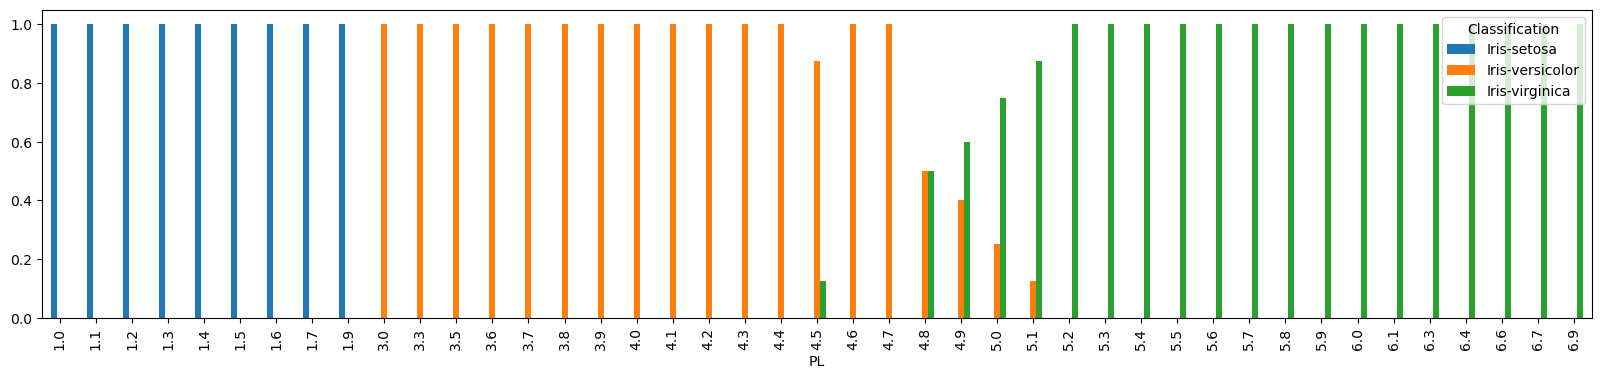

In [15]:
petal_length=pd.crosstab(df['PL'],df['Classification']) 
petal_length.div(petal_length.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(20,4))

<Axes: xlabel='PW'>

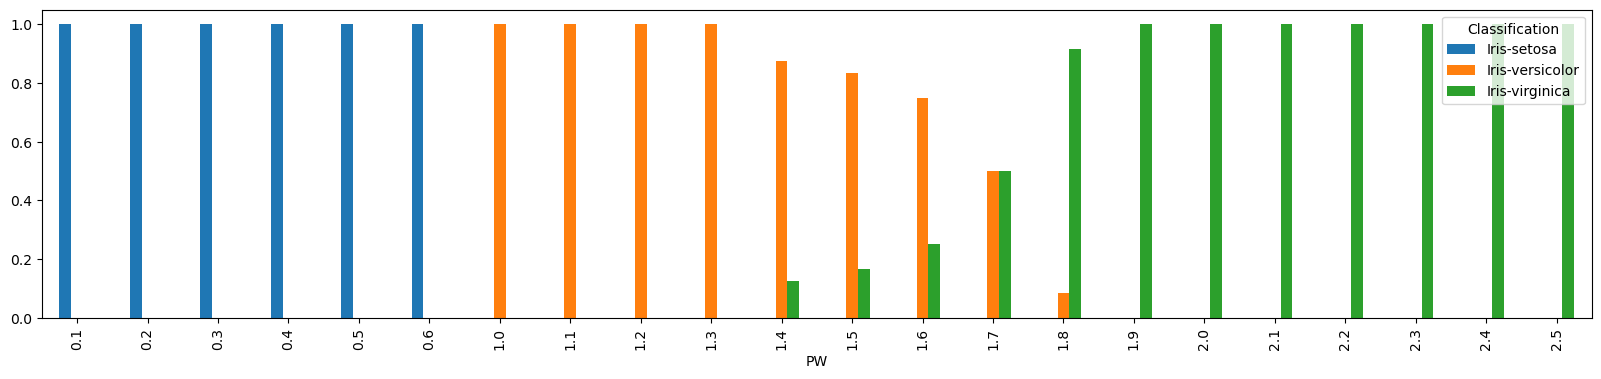

In [16]:
petal_width=pd.crosstab(df['PW'],df['Classification']) 
petal_width.div(petal_width.sum(1).astype(float), axis=0).plot(kind="bar", figsize=(20,4))

In [17]:
from sklearn.preprocessing import LabelEncoder

In [18]:
#le= LabelEncoder()

In [19]:
#df["Classification"] = le.fit_transform(df["Classification"])
df["Classification"]

0         Iris-setosa
1         Iris-setosa
2         Iris-setosa
3         Iris-setosa
4         Iris-setosa
            ...      
145    Iris-virginica
146    Iris-virginica
147    Iris-virginica
148    Iris-virginica
149    Iris-virginica
Name: Classification, Length: 150, dtype: object

In [20]:
df

,SL,SW,PL,PW,Classification
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [21]:
df["Classification"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [22]:
y = df["Classification"]
x = df.drop(['Classification'],axis=1)

In [23]:
from sklearn.model_selection import train_test_split

In [24]:
x_train,x_test,y_train,y_test = train_test_split(x,y, test_size = 0.2, random_state=42)

In [25]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [26]:
model = lr.fit(x_train,y_train)

In [27]:
y_predictions = model.predict(x_test)

In [28]:
from sklearn.metrics import confusion_matrix,accuracy_score

In [29]:
from sklearn.metrics import precision_score,recall_score,f1_score

In [30]:
confusion_matrix(y_test,y_predictions)

array([[10,  0,  0],
       [ 0,  9,  0],
       [ 0,  0, 11]], dtype=int64)

In [31]:
y_predictions

array(['Iris-versicolor', 'Iris-setosa', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-setosa',
       'Iris-versicolor', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-setosa', 'Iris-setosa',
       'Iris-setosa', 'Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-virginica',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-virginica',
       'Iris-virginica', 'Iris-setosa', 'Iris-setosa'], dtype=object)

In [32]:
print("accuracy =",accuracy_score(y_test,y_predictions))

accuracy = 1.0


In [34]:
import pickle

In [35]:
filename="savemodel.pickle"

In [36]:
pickle.dump(model,open(filename,"wb"))

In [37]:
load_model =pickle.load(open(filename,"rb"))

In [38]:
x_test.head()

,SL,SW,PL,PW
73,6.1,2.8,4.7,1.2
18,5.7,3.8,1.7,0.3
118,7.7,2.6,6.9,2.3
78,6.0,2.9,4.5,1.5
76,6.8,2.8,4.8,1.4


In [39]:
load_model.predict([[6.1,2.8,4.7,1.2]])

C:\Users\skshe\anaconda3\Lib\site-packages\sklearn\base.py:464: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['Iris-versicolor'], dtype=object)